In [5]:
import networkx as nx
import numpy as np
import random as rd
from scipy.sparse import csc_matrix
from IPython.display import Image
import itertools as it
import matplotlib.pyplot as plt

%matplotlib inline

## Some remarks to this notebook

You will find a lot of content in this notebook but don't worry!

There are only 3 exercises in here, which are a bit more involved though. However, since next Tuesday is a holiday there is a bit more time to work oh them. 

In between you can find some more tutorial cells that should serve to 

    o prepare for the exercises 

    o getting familar with networkx functionalities

    o providing some more python context

I hope that some of you find them use- or even helpful.

If you think this is all clear and nothing new to you than feel free to just skip all these extra cells. 

In [1]:
# Run this only in Colab environment
# from google.colab import drive
# drive.mount('/content/gdrive')
# path = '/content/gdrive/My Drive/<your_gdrivefolder>/data/'
###############################################################
# for local storage
path = '../notebooks_data/data/'

# abs path
path = ''

### paths
A *path* in a network is a sequence of edges connecting two nodes. 


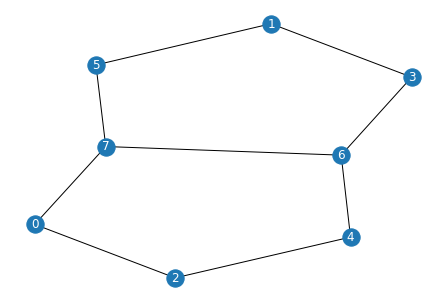

In [6]:
N = 8
A = np.random.randint(2,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops
G = nx.from_numpy_array(A_symmetric)

nx.draw(G,with_labels=True,font_color='w')


There can be more than one path between two nodes. 

In [7]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 1, 5, 7, 0, 2, 4], [3, 1, 5, 7, 6, 4], [3, 6, 4], [3, 6, 7, 0, 2, 4]]

A simple path is one without any cycles. If we allowed cycles, there would be infinitely many paths because one could always just go around the cycle as many times as desired.

We are often most interested in *shortest* paths. 

In [8]:
nx.shortest_path(G, 3, 4)


[3, 6, 4]

If you only care about the path length, there's a function for that too:


In [9]:
nx.shortest_path_length(G, 3, 4)

2

Note that a path length is defined here by the number of *edges* in the path, not the number of nodes, which implies

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
    
for nodes $u$ and $v$.

### components

we can check whether a graph is connected or not by doing:

In [10]:
nx.is_connected(G)

True

measuring the number of connected components

In [11]:
nx.number_connected_components(G)


1

# components: 2


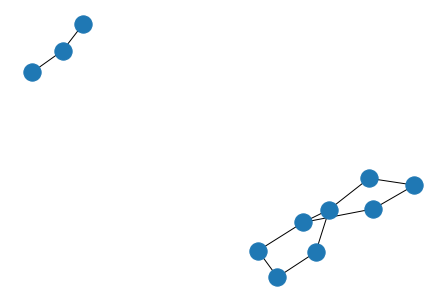

In [16]:
G.add_edge(8,9)
nx.draw(G)
print('# components:', nx.number_connected_components(G))

for obtaining the lists of comnnmected nodes in the components:

In [17]:
list(nx.connected_components(G))


[{0, 1, 2, 3, 4, 5, 6, 7}, {8, 9, 10}]

## largest connected component

We often care about the largest connected component (lcc), which is sometimes referred to as the giant component. We can make use of Python's builtin `max` function in order to obtain the largest connected component. By default, Python's `max` function sorts things in lexicographic (i.e. alphabetical) order, which is not helpful here. We want the maximum connected component when sorted in order of their sizes, so we pass `len` as a key function:



In [18]:
max(nx.connected_components(G), key=len)


{0, 1, 2, 3, 4, 5, 6, 7}

generate the actual subgraph consisting of the largest connected component with the `G.subgraph()` function:


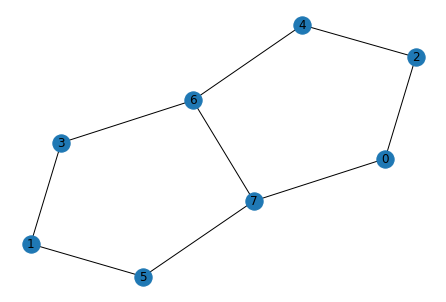

In [19]:
lcc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(lcc_nodes)

nx.draw(G_lcc, with_labels=True)

---
# Exercise 1 (7 pts)

Consider the network from the 2nd paper exercise 2 (generated by the next cell).

(i)   Print the adjacency matrix and the edgelist of the network (1pt)

(ii) Print the different components (1pt)

(iii)  Compute the clustering coefficient, diameter and density of the lcc-network (2pts)


(iv) Find the number of d=3 paths between nodes 2 and 3 (1pt)

(v)  Print out all the d=3 pathes between nodes 2 and 3 (1pt)

(vi) identify the node pair with the highst number of d=3 pathes (1pt)



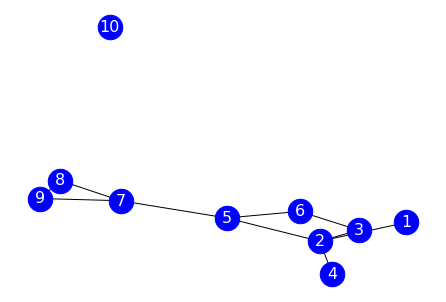

In [20]:
G = nx.Graph()
G.add_nodes_from(range(1,11))

G.add_edge(1,2)

G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(2,5)

G.add_edge(3,6)

G.add_edge(5,6)
G.add_edge(5,7)

G.add_edge(7,8)
G.add_edge(7,9)
G.add_edge(8,9)

nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=600,
        font_color='white',
        font_size=16,
        )
		

---
# EXERCISE 2 (9 pts)

The Vienna-subway-net

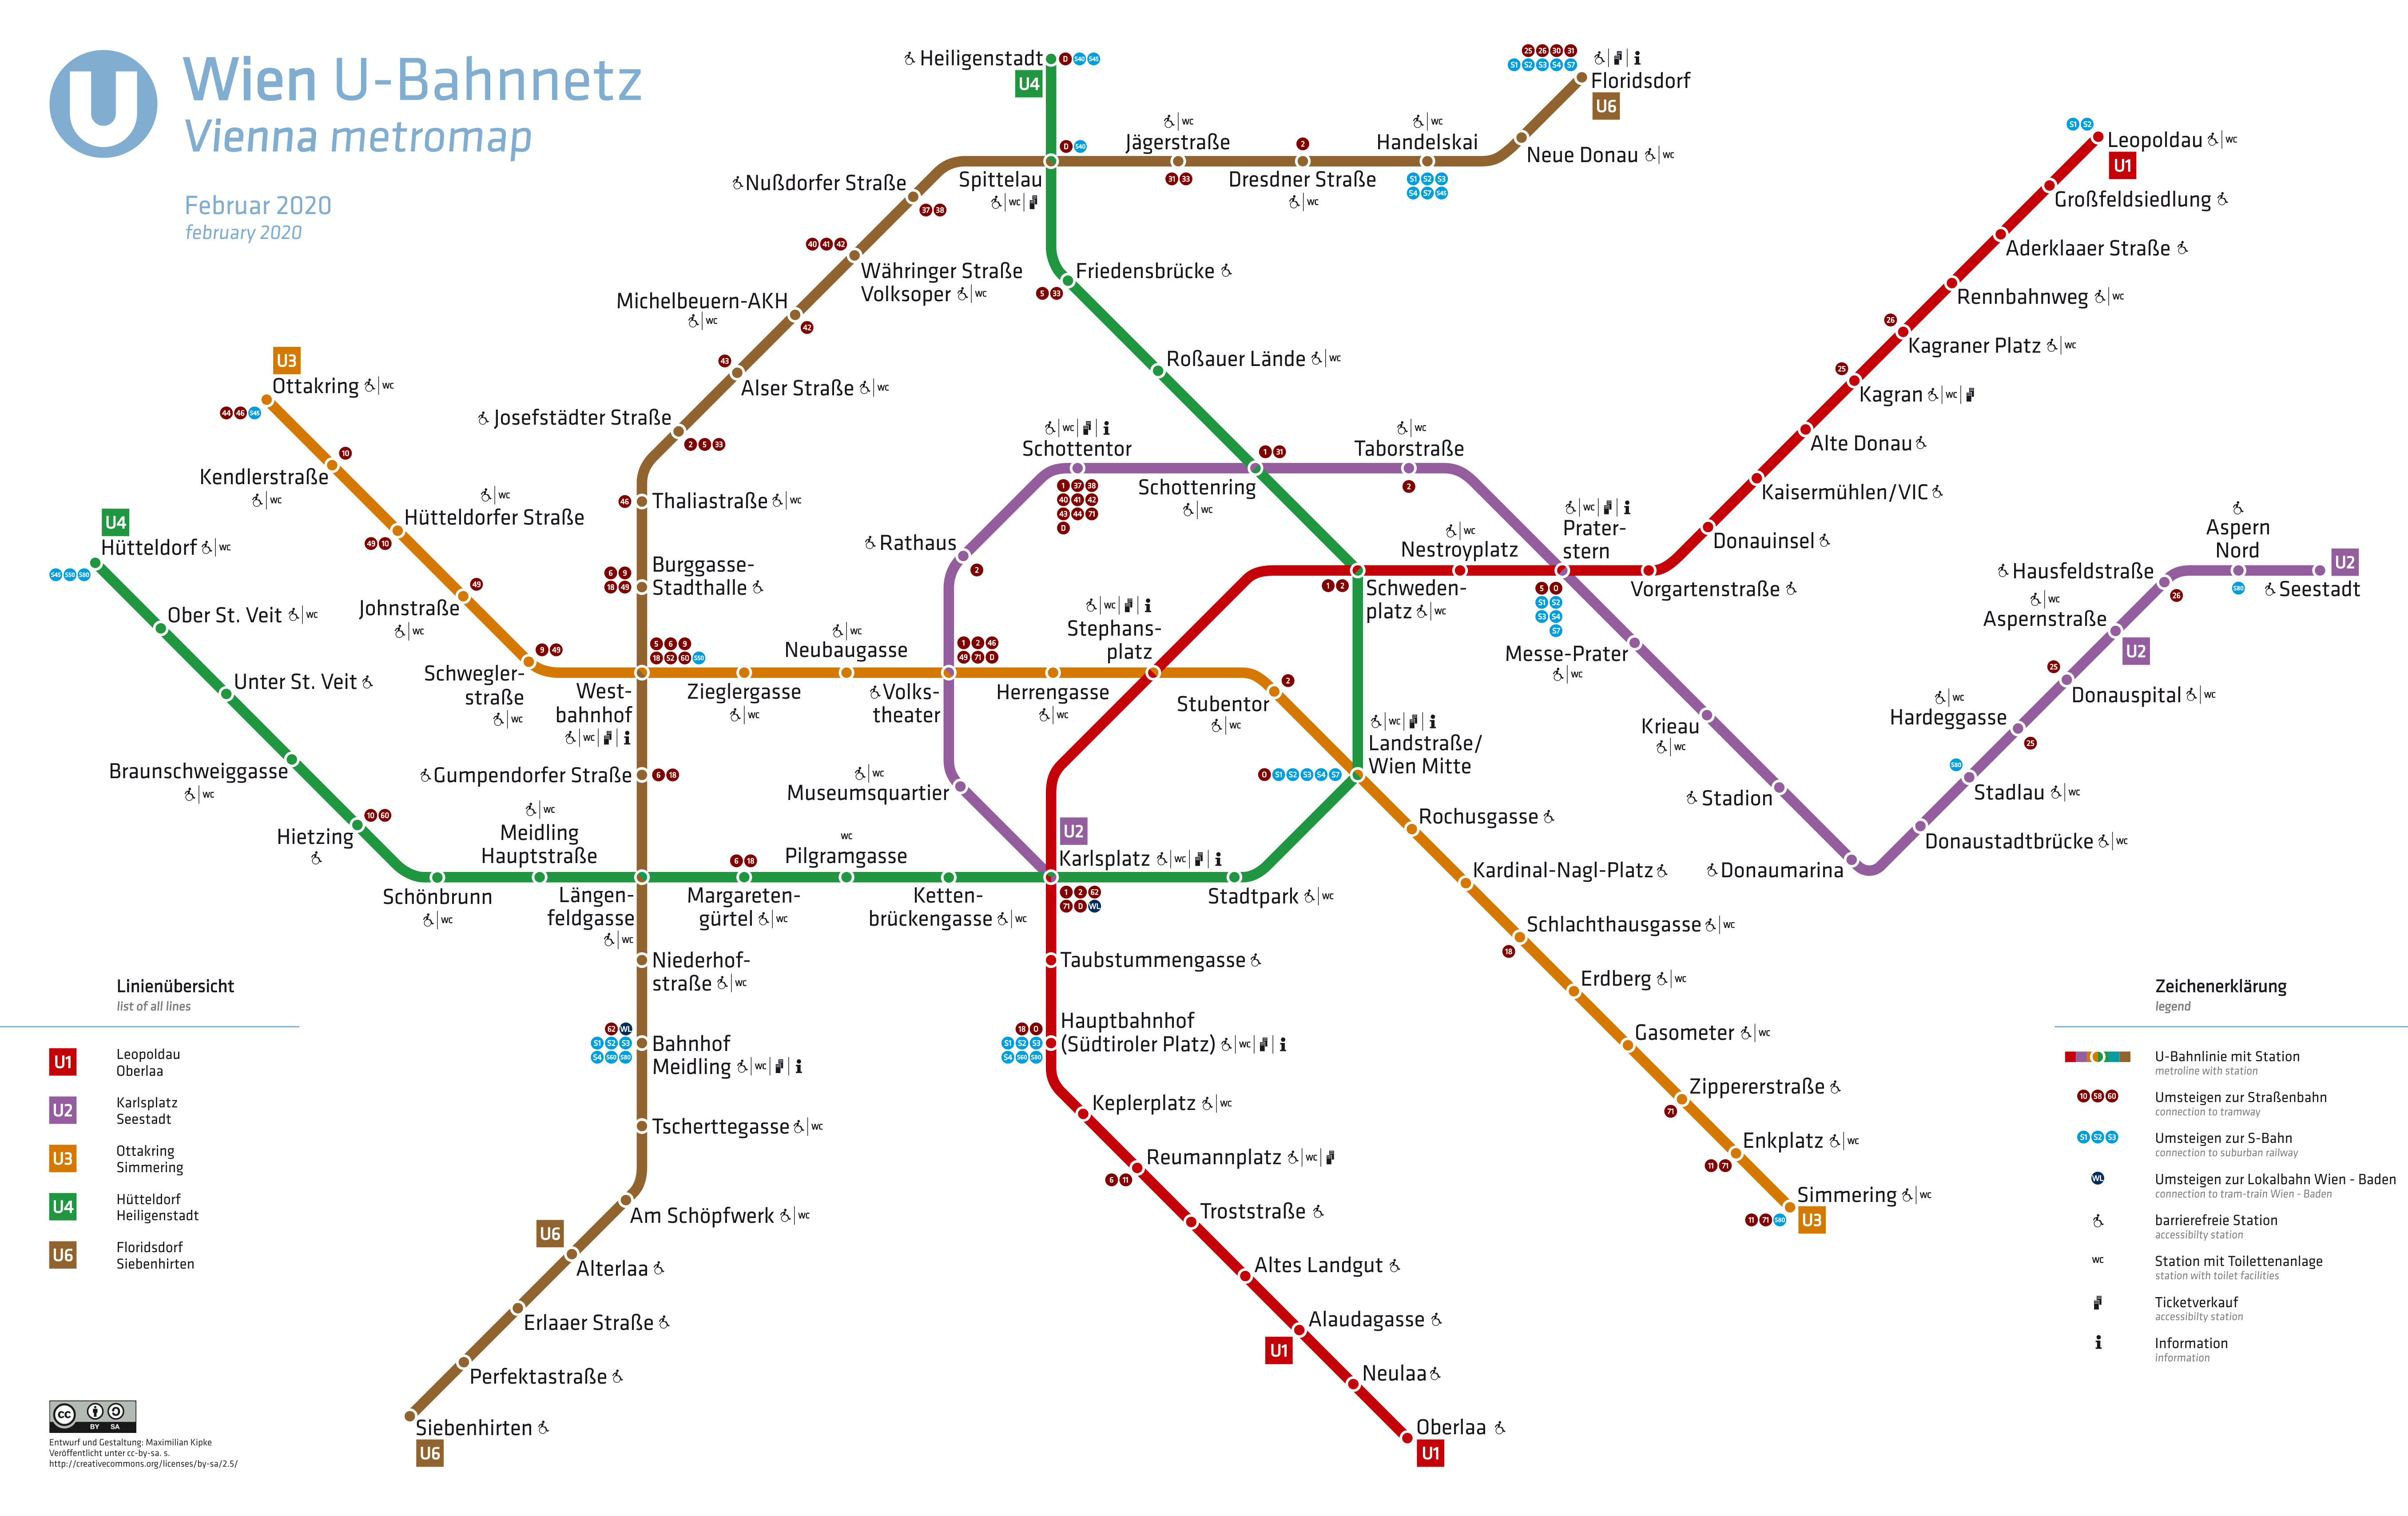

In [52]:
Image(path + 'U-Bahnnetz_Wien_2019.png')

In [74]:
# for more generic datasets it is sometimes necessary to parse them yourself
# in order to construct a network

G_subway = nx.Graph()
f = open(path + 'Vienna_subway.csv','r')
lines = f.readlines()
for line in lines[1:]:
    start_node = line.strip().split(';')[0]
    end_node = line.strip().split(';')[1]
    color = line.strip().split(';')[3]
    G_subway.add_edge(start_node,end_node,color=color)
f.close()


# nodes:  98
# edges:  104


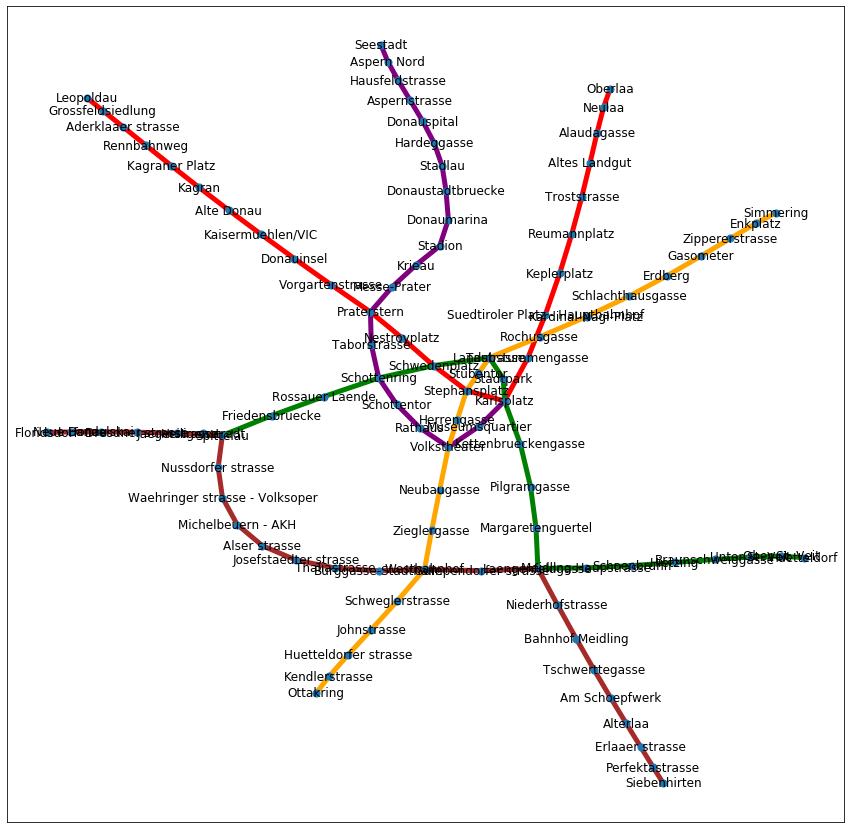

In [75]:
# a simple layout can be done by the networkx function spring_layout
# it basically considers the nodes as charged particles that repell each other 
# and edges as springs that attract connected nodes

print('# nodes: ', G_subway.number_of_nodes())
print('# edges: ', G_subway.number_of_edges())

colors = [G_subway[u][v]['color'] for u,v in G_subway.edges]

posG = nx.spring_layout(G_subway,iterations=200)
plt.figure(figsize=(15,15))
nx.draw_networkx(G_subway,pos = posG, node_size=50, node_color='#1f78b4',with_labels=1)
nx.draw_networkx_edges(G_subway,pos = posG,edge_color = colors,width=5)


(i) Find the the three most connected stations (computationally) (1pt)

(ii) Let's assume the subway always needs 2.5 minutes between all subsequent stations. What is the average traveling time for randomly chosen departure- and destination points? How long would the longest travel take (without detours)? (2pts)

(iii) Compute and plot the shortest path length distribution for the subway network. (2pts)

(iv) Write your own subway app: Create a function that get the subway network, a start and end station and returns the shortest connection (list of all stations to go). 
Try it out with start='Schoenbrunn' and end='Donauinsel'. (3pts)

To avoid running into too many tourists you want to get around 'Stephansdom'. 
Or your app is connected to a news feed that informs your system about temporally occuring traffic perturbations or station closures.

(v) Add a optional argument into your function that get a station to avoid. Try again with start='Schoenbrunn' and end='Donauinsel' and avoid 'Stephansdom' (1pt)

(extra) graphical representation of your path on the network with differnet colors for start, end and avoided node (+1pt)

---

## random graphs

## 1. Python's `random` module

Many network models rely on randomness in their generative algorithms. Python's [random module](https://docs.python.org/3.7/library/random.html) provides four key functions of use when coding network models.

#### `random.random`

Often in an algorithm, we need something to happen with some probability $p$. The canonical way to decide whether or not such an event happens is to generate a random number $r$ between 0 and 1, and if $r < p$, then the event occurs. The [random.random()](https://docs.python.org/3.7/library/random.html#random.random) function returns just such a random number in the interval [0, 1).


####  `random.choice`

When we have a population of discrete choices and we need to select one at random, we use [random.choice()](https://docs.python.org/3.7/library/random.html#random.choice). For example, instead of "[eeny, meeny, miny, moe](https://en.wikipedia.org/wiki/Eeny,_meeny,_miny,_moe)," we can use random.choice to choose a random name:

In [22]:
names = ['Alice', 'Bob', 'Cathy', 'Dan']
rd.choice(names)

'Alice'

#### `random.sample`

If we have a collection and we need to select more than one element without replacement, we use [random.sample()](https://docs.python.org/3.7/library/random.html#random.sample). For example, to choose two nodes at random from the nodes in a graph, we can use the following:

In [23]:
G = nx.cycle_graph(5)
rd.sample(G.nodes, 2)

[1, 4]

#### `random.choices`

We use [random.choices()](https://docs.python.org/3.7/library/random.html#random.choices) when we need to choose an element from a collection when the chances of selecting each element are not identical.

For an example, let's assume Alice, Bob, and Carol are in a raffle drawing. Alice bought one ticket, Bob bought three tickets, and Carol bought four tickets. We can simulate ten different draws of this raffle, replacing the drawn ticket each time, with the following code:

In [24]:
names = ['Alice', 'Bob', 'Carol']
tickets = [1, 3, 4]

for _ in range(10):
    print(rd.choices(names, tickets))

['Carol']
['Bob']
['Bob']
['Bob']
['Bob']
['Bob']
['Bob']
['Carol']
['Carol']
['Bob']


Running the above cell should give what we expect: Carol wins the drawing most often, with Bob winning some times, and Alice winning occasionally. Of course this outcome depends on the luck of the draw!

By specifying the keyword argument `k=`, we can choose *k* items from the collection *with replacement*:

In [25]:
rd.choices(names, tickets, k=10)

['Carol',
 'Carol',
 'Alice',
 'Carol',
 'Alice',
 'Bob',
 'Carol',
 'Carol',
 'Carol',
 'Carol']

The weights provided to `random.choices` do not have to be integers -- any numeric weights are fine.

### Random Network Model

The random network model, as formulated by Gilbert, has two parameters: the number of nodes $N$, and the link probability $p$. As in the book text, the algorithm for creating this network is as follows:

1. Select a pair of nodes, say i and j.
2. Generate a random number r between 0 and 1. If r < p, then add a link between i and j.
3. Repeat (1) and (2) for all pairs of nodes.

We'll need a couple of tools from Python for this task:

### Generating combinations

We've previously looped over all nodes in a graph, as well as all graph edges, but this algorithm requires us to loop over all *pairs* of nodes, *i.e.* all possible edges. The `itertools` module in Python's standard library gives us the [combinations()](https://docs.python.org/3.7/library/itertools.html#itertools.combinations) function, an elegant way to loop over pairs of elements in a sequence:

In [26]:
import itertools


elements = [0, 1, 2, 3, 4]
list(itertools.combinations(elements, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

The second argument to `itertools.combinations()` is the length of the sequences we want in the output. Since we want pairs, we'll specify 2. Note the nice properties of the output:

1. No repeat elements -- we don't want to consider self-loops like `('a', 'a')`.
2. Pairs are in sorted order -- `('a', 'b')` and `('b', 'a')` are the same edge in an undirected graph.

We can thus use this to loop over all pairs of nodes in a graph:

In [27]:
G = nx.Graph()
G.add_nodes_from(elements)

list(itertools.combinations(G.nodes, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

### Erdös-Rényi random graph model

Instead of specifying the link probability $p$, we can also generate a graph of $N$ nodes with exactly $M$ edges by using `random.sample()` to choose M of the possible edges generated with `itertools.combinations()`:

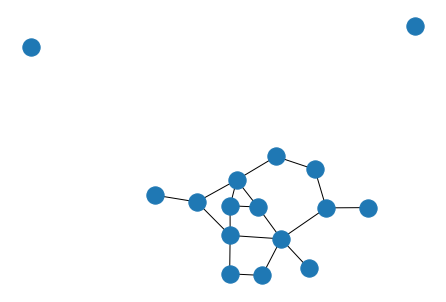

In [28]:
def gnm_random_graph(N, M):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    possible_edges = itertools.combinations(G.nodes, 2)
    edges_to_add = rd.sample(list(possible_edges), M)
    G.add_edges_from(edges_to_add)
    
    return G

G = gnm_random_graph(16, 18)
nx.draw(G)

### Gilbert random graph model

With these tools in our toolbelt, we can code the algorithm for the Gilbert random graph model.

Graph has 69 edges.


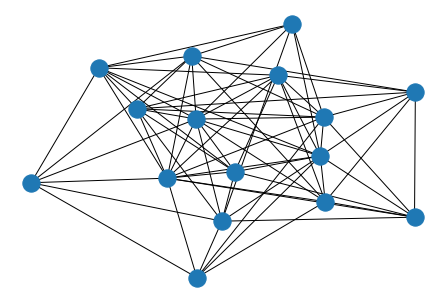

In [29]:
def gnp_random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i, j in itertools.combinations(G.nodes, 2):
        r = rd.random()
        if r < p:   
            G.add_edge(i, j)
        # Do nothing if r >= p
        
    return G
    
G = gnp_random_graph(16, 0.5)
nx.draw(G)
print('Graph has', G.number_of_edges(), 'edges.')

### NetworkX functions

NetworkX has a function for the $G_{n,p}$ random graph specifying number of nodes $N$ and link probability $p$:  [gnp_random_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html).

In addition, NetworkX provides [gnm_random_graph()](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html), which generates a $G_{n,m}$ graph, where we specify the number of nodes $N$ and the desired number of edges $M$.

### generate a network directly from a given matrix

you can define a numpy matrix and convert it into a Graph object


In [31]:
N = 8
A = np.random.randint(2,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops
print(A_symmetric)

[[0 0 1 0 0 0 1 1]
 [0 0 1 0 1 1 0 0]
 [1 1 0 0 1 0 0 1]
 [0 0 0 0 0 1 1 0]
 [0 1 1 0 0 0 0 1]
 [0 1 0 1 0 0 0 1]
 [1 0 0 1 0 0 0 0]
 [1 0 1 0 1 1 0 0]]


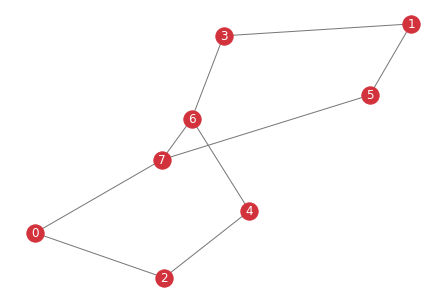

In [30]:
G = nx.from_numpy_array(A_symmetric)

nx.draw(G,
        with_labels=True,
        node_color='#d2323c',
        edge_color='#777777',
        node_size=300,
        font_color='white',
        font_size=12,
        )


for DIRECTED networks it works like this:


[[0 1 0 0 0 0 1 1]
 [0 0 1 1 1 0 0 1]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


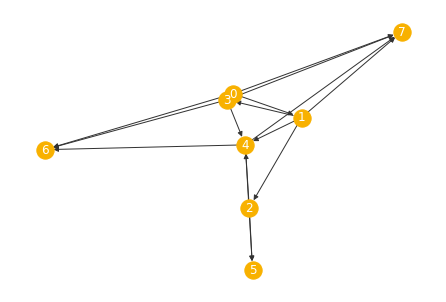

In [32]:
N = 8
A = np.random.randint(2,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A[np.tril_indices(A.shape[0], -1)] = 0  # set the lower left triangle to 0
np.fill_diagonal(A, 0) # write zeros on the diagonal to avoid selfloops

print(A)

# make explicit that you want the network to be directed
G = nx.from_numpy_array(A,create_using=nx.DiGraph)

nx.draw(G,
        with_labels=True,
        node_color='#f8b100',
        edge_color='#333333',
        node_size=300,
        font_color='white',
        font_size=12,
        )


and for WEIGHTED networks:


[[0.         0.67341973 0.74935817 0.80896872 0.60288855 0.2390995 ]
 [0.67341973 0.         0.04970011 0.89531271 0.01729003 0.87241347]
 [0.74935817 0.04970011 0.         0.68498996 0.53919489 0.51564664]
 [0.80896872 0.89531271 0.68498996 0.         0.63241681 0.11108197]
 [0.60288855 0.01729003 0.53919489 0.63241681 0.         0.26452065]
 [0.2390995  0.87241347 0.51564664 0.11108197 0.26452065 0.        ]]


{0: Text(0.03638268866252145, -0.004747137899181547, '0'),
 1: Text(0.5637344785191452, -0.825424310871147, '1'),
 2: Text(-0.6794801386768701, 0.33735145492260354, '2'),
 3: Text(0.6325557953390508, 0.2611684953531016, '3'),
 4: Text(-0.07320155281341877, 1.0, '4'),
 5: Text(-0.4799912710304282, -0.7683485015053767, '5')}

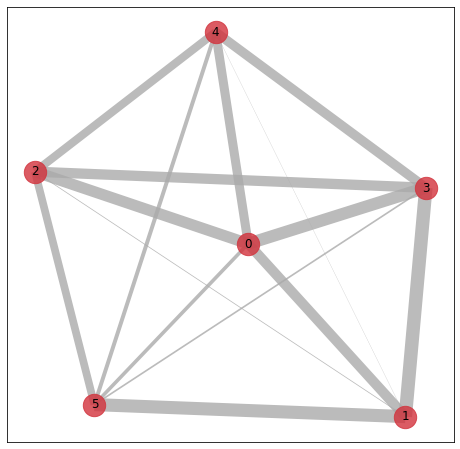

In [33]:
N = 6
A = np.random.uniform(0,1,size=(N,N))  # generate a matrix randomly filled with 0 and 1
A_symmetric = np.tril(A) + np.tril(A, -1).T # make it symmetric (to get an undirected network)
np.fill_diagonal(A_symmetric, 0) # write zeros on the diagonal to avoid selfloops

print(A_symmetric)


G = nx.from_numpy_array(A_symmetric)


l_w = []
for a,b in G.edges():
    l_w.append(G[a][b]['weight'])


plt.figure(figsize=(8,8))

pos = nx.spring_layout(G)

edgewidth = [15*d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos=pos, width=edgewidth,edge_color='#aaaaaa',alpha=.8)

nx.draw_networkx_nodes(G, pos=pos, node_size=500,node_color='#d2323c',alpha=.8)

nx.draw_networkx_labels(G, pos=pos)

---
# Exercise 3  (4 pts)

Consider a Gilbert random graphs with $N=500$ nodes

(i) For a given connection probability $p=0.01$ compute the average degree $\langle k\rangle$, the number of connected components, diameter and the average shortest path length. Plot the degree distribution. 

(2pts)

(ii) Iterate over a range of connection probabilities and measure average degree  $\langle k\rangle$ 

Plot $\langle k\rangle$ over $p$ and compare the result to your expectation. 

(2pts)

(iii)
Iterate over a range of connection probabilities and measure the size of the largest connected component $S_{lcc}$ now. 
(You can do both measurements for ii and iii in one loop)


Plot $S_{lcc}$ over $p$ and make sure that you can see the differnt regimes of connectedness.  

Plot $S_{lcc}$ also over the average the average degree and discuss briefly what you observe. 

(3pts)

---